In [1]:
import pandas as pd
import numpy as np

In [2]:
# ---------- データ読み込み ----------
print("データ読み込みを開始...")
df = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_for_prediction.csv")
print("データ読み込み完了")

# ラベル名の取得（マルチラベル分類用）
multilabel_colnames = [col for col in df.columns if col.startswith("on_day_reason_group_") and col.endswith("_next")]


X = df.drop(columns=['will_be_re_registered', 'days_until_next_category'] +
            [col for col in df.columns if col.startswith("on_day_reason_group_") and col.endswith("_next")]).values

y_binary = df['will_be_re_registered'].values
# y_multilabel = df[multilabel_colnames].values

データ読み込みを開始...
データ読み込み完了


In [3]:
unique, counts = np.unique(y_binary, return_counts=True)
print("Binary label distribution:", dict(zip(unique, counts)))


Binary label distribution: {np.int64(0): np.int64(898499), np.int64(1): np.int64(1122975)}


In [4]:
y_multilabel = df[multilabel_colnames]
y_multilabel.value_counts()

on_day_reason_group_cancellation_next  on_day_reason_group_collateral_next  on_day_reason_group_inheritance_or_gift_transfer_next  on_day_reason_group_ownership_origin_next  on_day_reason_group_physical_change_next  on_day_reason_group_restriction_next  on_day_reason_group_sale_next  on_day_reason_group_title_or_right_correction_next  on_day_reason_group_title_registration_next
0.0                                    0.0                                  0.0                                                    0.0                                        0.0                                       0.0                                   0.0                            0.0                                                 0.0                                            898499
                                                                                                                                                                                                                                    

# 次の登記原因と次までの登記間隔日数に関連はあるのか

In [2]:
df = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_for_prediction.csv")

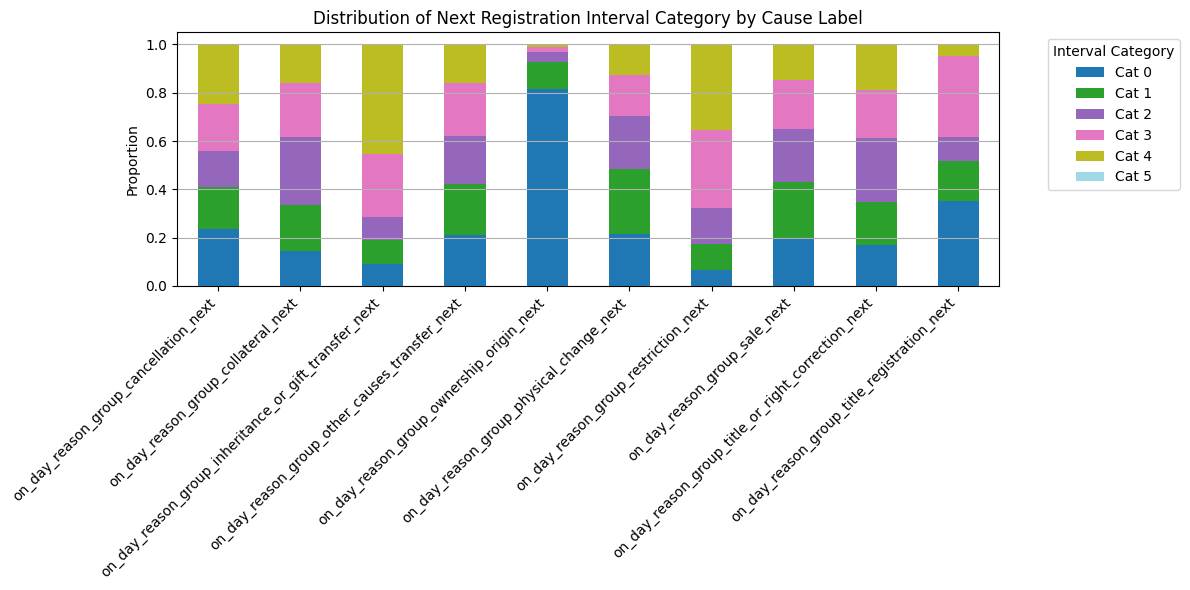

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===== 設定 =====
# カテゴリ列
interval_col = "days_until_next_category"

# マルチラベル列群（0/1）
multilabel_colnames = [col for col in df.columns if col.startswith("on_day_reason_group_") and col.endswith("_next")]

# ラベルごとの interval category 分布を集計
category_labels = [0, 1, 2, 3, 4, 5]
distribution = {}

for label in multilabel_colnames:
    subset = df[df[label] == 1]  # ラベルが付いているサンプルだけ抽出
    counts = subset[interval_col].value_counts(normalize=True).reindex(category_labels, fill_value=0)
    distribution[label] = counts

# ===== データフレームにまとめる =====
dist_df = pd.DataFrame(distribution).T  # 転置して rows: 登記原因, cols: カテゴリ
dist_df.columns = [f"Cat {i}" for i in category_labels]

# ===== 可視化 =====
dist_df.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.ylabel("Proportion")
plt.title("Distribution of Next Registration Interval Category by Cause Label")
plt.legend(title="Interval Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


C:\Users\GUESTUSER\AppData\Local\Temp\ipykernel_20396\4127770667.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x="Cause", y="count", palette="Set2")


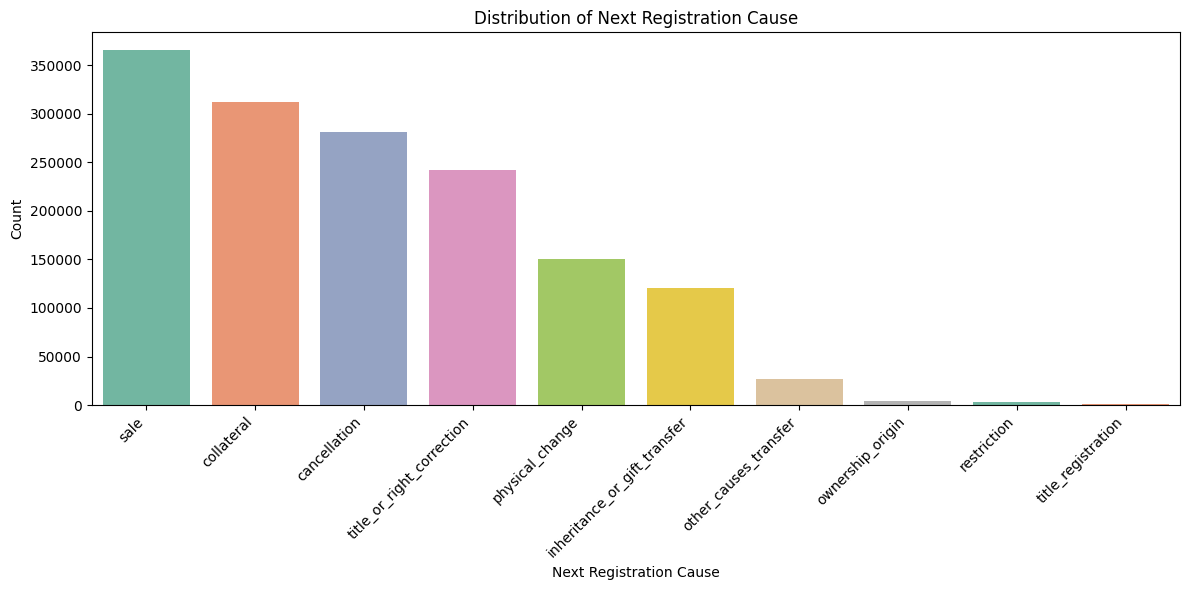

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# マルチラベル列の合計（1が立ってる数 = 件数）
cause_counts = df[multilabel_colnames].sum().sort_values(ascending=False)

# ラベル整形（読みやすく）
plot_df = cause_counts.rename(lambda x: x.replace("on_day_reason_group_", "").replace("_next", "")).to_frame(name="count")
plot_df.reset_index(inplace=True)
plot_df.rename(columns={"index": "Cause"}, inplace=True)

# 可視化
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x="Cause", y="count", palette="Set2")
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Next Registration Cause")
plt.ylabel("Count")
plt.xlabel("Next Registration Cause")
plt.tight_layout()
plt.show()


# それぞれの登記原因とその後の登記間隔の大小の関係

In [1]:
import pandas as pd
df = pd.read_csv(r"D:\fujiwara\M\data\after_preprocess\land_data_for_prediction.csv")

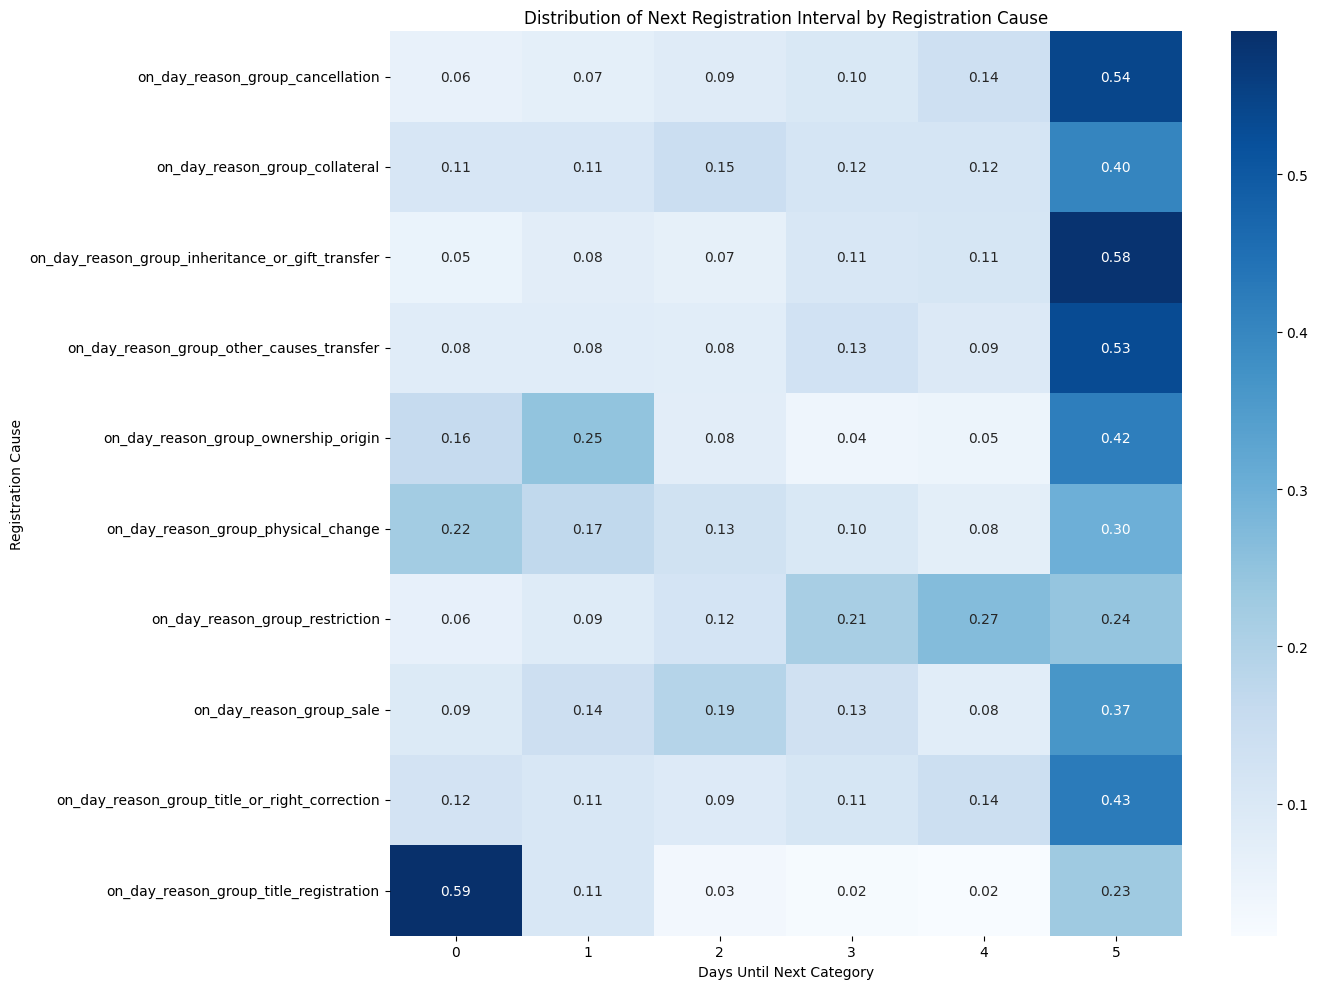

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 登記原因の列を抽出
reason_cols = [col for col in df.columns if col.startswith("on_day_reason_group_") and not col.endswith("_next")]

# 1.0になっている原因をリスト化
exploded = df[reason_cols + ['days_until_next_category']].copy()
exploded['reasons'] = exploded[reason_cols].apply(lambda row: [col for col in reason_cols if row[col] == 1.0], axis=1)

# 行を爆発（複数の原因を個別の行に展開）
exploded = exploded.explode('reasons')

# 分布を集計
count_df = exploded.groupby(['reasons', 'days_until_next_category']).size().reset_index(name='count')

# 割合ベースに変換（各原因ごとに合計100%になるように）
count_df['ratio'] = count_df.groupby('reasons')['count'].transform(lambda x: x / x.sum())

# ピボット（ヒートマップ用）
pivot_df = count_df.pivot(index='reasons', columns='days_until_next_category', values='ratio').fillna(0)

# 可視化（ヒートマップ）
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Distribution of Next Registration Interval by Registration Cause")
plt.xlabel("Days Until Next Category")
plt.ylabel("Registration Cause")
plt.tight_layout()
plt.show()


## 相続の次が売買のデータに対する間隔日数の分布

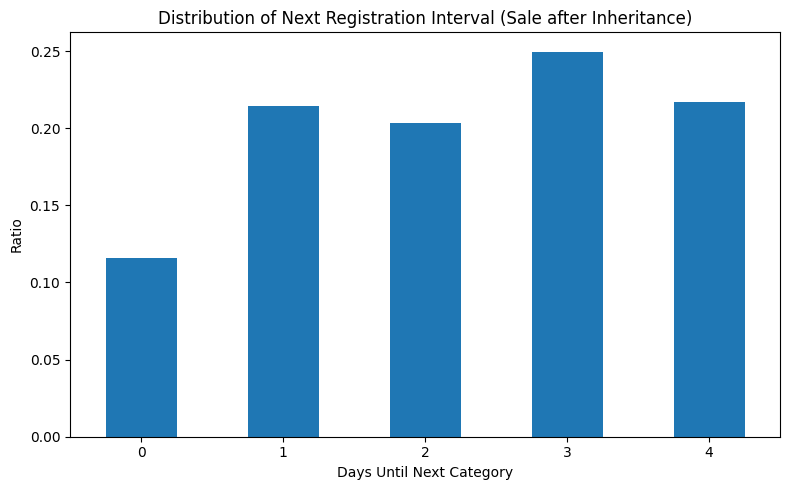

days_until_next_category
0    0.115863
1    0.214380
2    0.203317
3    0.249662
4    0.216778
Name: proportion, dtype: float64


In [3]:
import matplotlib.pyplot as plt

# 条件：相続（現登記原因）かつ 次が売買
mask = (df["on_day_reason_group_inheritance_or_gift_transfer"] == 1.0) & \
       (df["on_day_reason_group_sale_next"] == 1.0)

# 該当データ抽出
df_inheritance_sale = df.loc[mask]

# カテゴリ分布（割合）
category_dist = (
    df_inheritance_sale["days_until_next_category"]
    .value_counts(normalize=True)
    .sort_index()
)

# 可視化（棒グラフ）
plt.figure(figsize=(8, 5))
category_dist.plot(kind="bar")
plt.xlabel("Days Until Next Category")
plt.ylabel("Ratio")
plt.title("Distribution of Next Registration Interval (Sale after Inheritance)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 確認用に表も表示
print(category_dist)
